# Desafio 5

Neste desafio, vamos praticar sobre redução de dimensionalidade com PCA e seleção de variáveis com RFE. Utilizaremos o _data set_ [Fifa 2019](https://www.kaggle.com/karangadiya/fifa19), contendo originalmente 89 variáveis de mais de 18 mil jogadores do _game_ FIFA 2019.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
from math import sqrt
import numpy as np
import pandas as pd
import scipy.stats as sct

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.stats as st

from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from loguru import logger

/home/naiara/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
fifa = pd.read_csv("fifa.csv")

In [4]:
columns_to_drop = ["Unnamed: 0", "ID", "Name", "Photo", "Nationality", "Flag",
                   "Club", "Club Logo", "Value", "Wage", "Special", "Preferred Foot",
                   "International Reputation", "Weak Foot", "Skill Moves", "Work Rate",
                   "Body Type", "Real Face", "Position", "Jersey Number", "Joined",
                   "Loaned From", "Contract Valid Until", "Height", "Weight", "LS",
                   "ST", "RS", "LW", "LF", "CF", "RF", "RW", "LAM", "CAM", "RAM", "LM",
                   "LCM", "CM", "RCM", "RM", "LWB", "LDM", "CDM", "RDM", "RWB", "LB", "LCB",
                   "CB", "RCB", "RB", "Release Clause"
]

try:
    fifa.drop(columns_to_drop, axis=1, inplace=True)
except KeyError:
    logger.warning(f"Columns already dropped")

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
fifa.head()

,Age,Overall,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [6]:
fifa.columns

Index(['Age', 'Overall', 'Potential', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

## Questão 1

Qual fração da variância consegue ser explicada pelo primeiro componente principal de `fifa`? Responda como um único float (entre 0 e 1) arredondado para três casas decimais.

In [7]:
#Ver quais e quantos valores missing eu tenho
df = pd.DataFrame({'tipo': fifa.dtypes,
              'missing':((fifa.isna().sum()/fifa.shape[0])*100),
              'unicos': fifa.nunique()})
df.sort_values(by='missing', ascending=False)

,tipo,missing,unicos
ShotPower,float64,0.263635,92
Jumping,float64,0.263635,74
Strength,float64,0.263635,74
LongShots,float64,0.263635,92
Aggression,float64,0.263635,85
Interceptions,float64,0.263635,89
Positioning,float64,0.263635,94
Vision,float64,0.263635,85
Penalties,float64,0.263635,87
Composure,float64,0.263635,84


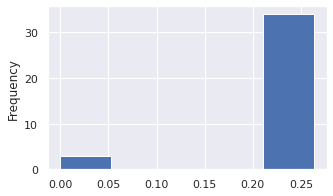

In [8]:
plt.figure(figsize = (5,3))
df.missing.plot.hist(bins=5);

In [9]:
# fazer um novo dataframe fifa substituindo os valores NA pela média e utilizar ele agora
fifa_semna = fifa.copy()
dadoscomna = ['Crossing','Finishing','HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
              'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility', 'Reactions', 
              'Balance', 'ShotPower','Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
              'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure','Marking', 'StandingTackle', 
              'SlidingTackle', 'GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes']
fifa_semna[dadoscomna] = fifa_semna[dadoscomna].fillna(fifa_semna[dadoscomna].mean())

#Por padrão: PCA(n_components=None), ou seja, não estou reduzindo a dimensionalidade
pca = PCA().fit(fifa_semna)
evr_semna = pca.explained_variance_ratio_
print(evr_semna.max())

0.5652676537694254


In [10]:
# Ao invés de substituir os NA pela média, resolvi dropar, deu o praticamente o mesmo resultado
fifa.dropna(inplace=True)
pca = PCA().fit(fifa)
evr = pca.explained_variance_ratio_

print('O PC1 explica',round(evr[0]*100,2),'% da variância dos dados')

O PC1 explica 56.53 % da variância dos dados


In [11]:
aux = pd.DataFrame({'PCs':range(1,38),
              'variancia_explicada_media':evr_semna,
              'variancia_explicada_drop':evr})

aux.head()

,PCs,variancia_explicada_media,variancia_explicada_drop
0,1,0.565268,0.565281
1,2,0.181021,0.181025
2,3,0.059527,0.059528
3,4,0.043426,0.043427
4,5,0.026353,0.026353


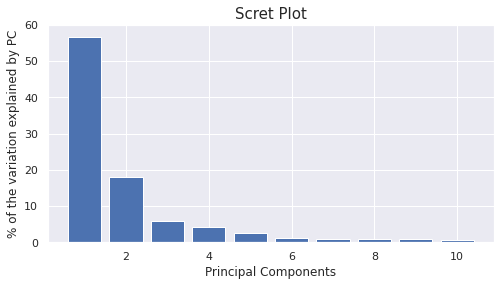

In [12]:
plt.figure(figsize=(8,4))
plt.title("Scret Plot", size=15)
plt.bar(aux.PCs.head(10), aux.variancia_explicada_drop.head(10)*100)
plt.ylim(0,60)
plt.xlabel("Principal Components")
plt.ylabel("% of the variation explained by PC")
plt.show()

In [13]:
def q1():
    fifa.dropna(inplace=True)
    pca = PCA().fit(fifa)
    evr = pca.explained_variance_ratio_
    return round(float(evr[0]),3)

q1()

0.565

## Questão 2

Quantos componentes principais precisamos para explicar 95% da variância total? Responda como um único escalar inteiro.

In [14]:
# Podemos achar o número de componentes necessários para explicar determinada fração da variância total:
cumulative_variance_ratio = np.cumsum(evr)
component_number = np.argmax(cumulative_variance_ratio >= 0.95) + 1 # Contagem começa em zero.
component_number

15

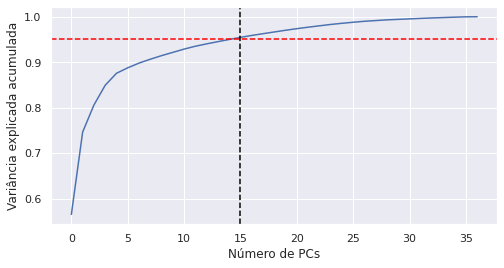

In [15]:
# Plotar onde esses valores se encontram (acumulado de 95% das variância e 15 componentes)
plt.figure(figsize(8,4))
g = sns.lineplot(range(len(evr)), np.cumsum(evr))
g.axes.axhline(0.95, ls="--", color="red")
g.axes.axvline(15, ls="--", color="black")
plt.xlabel('Número de PCs')
plt.ylabel('Variância explicada acumulada');

In [16]:
def q2():
    fifa.dropna(inplace=True)
    pca = PCA().fit(fifa)
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    component_number = np.argmax(cumulative_variance_ratio >= 0.95) + 1
    return int(component_number)

q2()

15

## Questão 3

Qual são as coordenadas (primeiro e segundo componentes principais) do ponto `x` abaixo? O vetor abaixo já está centralizado. Cuidado para __não__ centralizar o vetor novamente (por exemplo, invocando `PCA.transform()` nele). Responda como uma tupla de float arredondados para três casas decimais.

In [17]:
#O x é um ponto com 37 coordenadas:

x = [0.87747123,  -1.24990363,  -1.3191255, -36.7341814, -35.55091139, -37.29814417, -28.68671182, 
     -30.90902583, -42.37100061, -32.17082438, -28.86315326, -22.71193348, -38.36945867, -20.61407566, 
     -22.72696734, -25.50360703, 2.16339005, -27.96657305, -33.46004736,  -5.08943224, -30.21994603,
     3.68803348, -36.10997302, -30.86899058, -22.69827634, -37.95847789, -22.40090313, -30.54859849,
     -26.64827358, -19.28162344, -34.69783578, -34.6614351, 48.38377664,  47.60840355,  45.76793876,  
     44.61110193, 49.28911284 ]

len(x)

37

In [18]:
#Definindo que só quero dois componentes PC1 e PC2
pca = PCA(n_components = 2)
pca.fit(fifa)
evr = pca.explained_variance_ratio_

print('Escolhendo apenas dois componentes, podemos explicar',round(sum(evr)*100,2),'% dos dados')

Escolhendo apenas dois componentes, podemos explicar 74.63 % dos dados


In [19]:
#Esses componentes, o PC1 e PC2, são vetores unitários em que cada valor explica uma variável
#O primeiro valor do primeiro vetor explica Age (é isso?)
pca.components_

array([[-6.16388751e-03, -3.70623864e-02, -2.27401748e-02,
        -2.13639023e-01, -1.98891213e-01, -1.70828950e-01,
        -1.80309140e-01, -1.87038764e-01, -2.33139606e-01,
        -2.07690956e-01, -1.84764187e-01, -1.67186902e-01,
        -2.12972623e-01, -1.38740617e-01, -1.34902279e-01,
        -1.38433521e-01, -4.91611013e-02, -1.16410947e-01,
        -1.95840156e-01, -4.07181861e-02, -1.72711671e-01,
        -2.33585866e-02, -2.16594765e-01, -1.53339724e-01,
        -1.50834334e-01, -2.24571087e-01, -1.29586783e-01,
        -1.62548283e-01, -1.01038031e-01, -1.53454113e-01,
        -1.59617493e-01, -1.47955869e-01,  2.06147192e-01,
         1.96645602e-01,  1.91129889e-01,  1.97401130e-01,
         2.08994083e-01],
       [ 8.87203494e-03,  1.58367355e-04, -7.78142440e-03,
        -4.43084573e-02, -2.57629630e-01,  1.18911964e-01,
         1.21869793e-02, -1.91182282e-01, -1.18898465e-01,
        -1.27744634e-01, -1.00178915e-01,  4.89136910e-02,
        -5.12678591e-02, -9.84

In [20]:
# Multiplicando o vetor dos coeficientes (components) pelos valores de x 
# (que seriam os x1, x2, x3... substituidos por valores) encontramos um valor de posição pro PC1
coord = pca.components_.dot(x).round(3)
list(coord)

[186.556, -6.592]

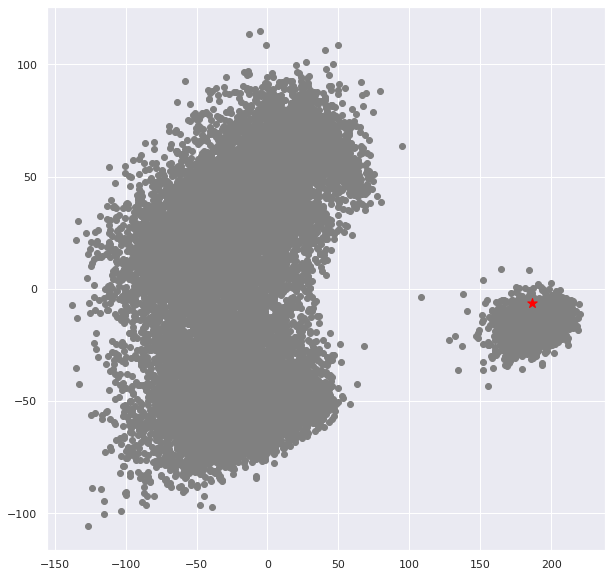

In [36]:
pca = PCA().fit(fifa)
pca_points = pca.transform(fifa)

plt.figure(figsize=(10,10))

plt.scatter(pca_points[:, 0], pca_points[:, 1], c='gray')
point = pca.components_.dot(x)
plt.scatter(point[0], point[1], c='red',marker="*", s=100);
plt.show()

In [22]:
# Outra forma de calcular:
pca = PCA(n_components = 2).fit(fifa)
[round(sum(coordinate),3) for coordinate in pca.components_ * x]  

[186.556, -6.592]

In [37]:
def q3():
    pca = PCA(n_components = 2).fit(fifa)
    res = pca.components_.dot(x).round(3)  
    return tuple(res)

q3()

(186.556, -6.592)

## Questão 4

Realize RFE com estimador de regressão linear para selecionar cinco variáveis, eliminando uma a uma. Quais são as variáveis selecionadas? Responda como uma lista de nomes de variáveis.

In [24]:
#RFE com estimador de reg linear com 5 variáveis para selecionar
reg = LinearRegression()
rfe = RFE(reg, n_features_to_select= 5)

In [25]:
#Definindo minhas variáveis de treino
X = fifa.drop(columns ='Overall')
y = fifa['Overall']

In [26]:
#Fit nos dados
rfe.fit(X, y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=0)

In [27]:
#Vendo quais colunas foram selecionadas
rfe.support_

array([ True,  True, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True])

In [28]:
pd.DataFrame({'coluna': X.columns,
              'bool': rfe.get_support()}).sort_values(by='bool',ascending=False).head(6)

,coluna,bool
0,Age,True
11,BallControl,True
1,Potential,True
15,Reactions,True
35,GKReflexes,True
5,ShortPassing,False


In [29]:
X.columns

Index(['Age', 'Potential', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [30]:
X.columns[rfe.support_]

Index(['Age', 'Potential', 'BallControl', 'Reactions', 'GKReflexes'], dtype='object')

In [31]:
def q4():
    reg = LinearRegression()
    rfe = RFE(reg, n_features_to_select= 5)
    
    X = fifa.drop(columns ='Overall')
    y = fifa['Overall']
    
    rfe.fit(X, y)
    
    return list(X.columns[rfe.support_])
    
q4()

['Age', 'Potential', 'BallControl', 'Reactions', 'GKReflexes']